# Fit the DDM on individual data

In [1]:
import rlssm
import pandas as pd
import os

## Import the data

In [2]:
data = pd.read_csv('../../data/data_experiment.csv', index_col=0)
data = data[data.participant == 10].reset_index(drop=True)

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,10,1,1,61,52,4,3,1,1.285418,0
1,10,1,2,54,37,4,2,1,1.577622,0
2,10,1,3,51,51,4,3,2,1.564731,0
3,10,1,4,50,35,3,1,2,1.217245,1
4,10,1,5,59,50,4,2,3,1.929781,0


## Initialize the model

In [3]:
model = rlssm.DDModel(hierarchical_levels = 1)

Using cached StanModel


## Fit

In [4]:
# sampling parameters
n_iter = 500
n_chains = 2
n_thin = 1

In [5]:
model_fit = model.fit(data,
                      print_diagnostics=False,
                      thin = n_thin,
                      iter_warmup = n_iter,
                      iter_sampling = n_iter,
                      chains = n_chains)

INFO:cmdstanpy:CmdStan start processing


Fitting the model using the priors:
drift_priors {'mu': 1, 'sd': 5}
threshold_priors {'mu': 0, 'sd': 5}
ndt_priors {'mu': 0, 'sd': 5}


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


### get Rhat

In [6]:
model_fit.rhat

,rhat,variable
name,,
lp__,1.0,lp__
drift,1.0,drift
threshold,1.0,threshold
ndt,1.0,ndt
drift_ll[1],1.0,drift_ll[1]
...,...,...
log_lik[235],1.0,log_lik[235]
log_lik[236],1.0,log_lik[236]
log_lik[237],1.0,log_lik[237]


### get wAIC

In [7]:
model_fit.waic

{'lppd': -247.58179660420438,
 'p_waic': 3.508536010859297,
 'waic': 502.1806652301274,
 'waic_se': 27.96799944940972}

## Posteriors

In [8]:
model_fit.samples.describe()

,transf_drift,transf_threshold,transf_ndt
count,1000.000000,1000.000000,1000.000000
mean,0.633833,1.792693,0.799732
std,0.080451,0.059354,0.011018
min,0.402800,1.637270,0.752369
25%,0.578629,1.753850,0.792860
50%,0.631744,1.789915,0.800666
75%,0.693277,1.833973,0.807891
max,0.872480,1.977150,0.826394


In [9]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

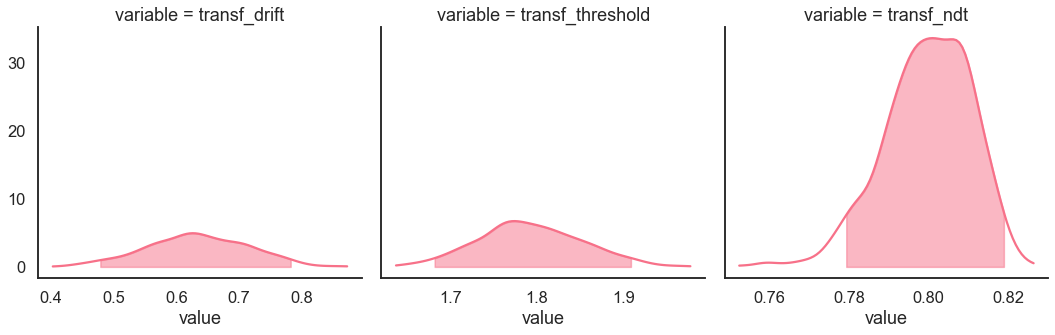

In [10]:
model_fit.plot_posteriors(height=5, show_intervals="HDI", alpha_intervals=.05);

## Posterior predictives

### Ungrouped

In [11]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)
pp

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         1.641528  1.066528  1.075528  1.258528  0.961528  1.133528   
2         1.746555  0.946555  1.604555  1.066555  0.942555  1.689555   
3         2.183282  2.087282  0.996282  3.618282  1.115282  1.028282   
4         1.117674  1.357674  1.414674  1.121674  1.029674  0.971674   
5         1.752669  1.171669  1.472669  1.249669  2.120669  0.907669   
...            ...       ...       ...       ...       ...       ...   
96        1.579935  1.456935  2.214935  1.146935  1.694935  1.830935   
97        1.016966  1.052966  1.287966  2.317966  1.107966  1.113966   
98        1.357904  0.970904  0.953904  1.947904  1.133904  1.956904   
99        1.645840  1.080840  3.424840  2.213840  1.050840  1.863840   
100       3.145356  1.600356  2.028356  1.221356  1.161356  1.175356   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      230  231  232  233   
sample                                            ...                           
1         1.767528  1.639528  1.101528  1.007528  ...      0.0  1.0  1.0  0.0   
2         1.779555  0.862555  0.949555  1.459555  ...      1.0  0.0  1.0  1.0   
3         0.977282  1.348282  1.071282  1.337282  ...      0.0  1.0  1.0  1.0   
4         1.313674  1.495674  1.987674  1.618674  ...      0.0  1.0  1.0  1.0   
5         1.393669  1.326669  1.039669  2.373669  ...      1.0  1.0  1.0  0.0   
...            ...       ...       ...       ...  ...      ...  ...  ...  ...   
96        1.003935  2.050935  0.964935  1.196935  ...      0.0  1.0  1.0  1.0   
97        1.537966  3.588966  0.977966  1.255966  ...      1.0  1.0  1.0  1.0   
98        1.606904  2.573904  1.278904  1.381904  ...      1.0  1.0  0.0  1.0   
99        1.739840  0.942840  1.114840  1.253840  ...      1.0  1.0  1.0  1.0   
100       1.430356  1.540356  1.700356  1.043356  ...      1.0  1.0  1.0  0.0   

variable                                
trial     234  235  236  237  238  239  
sample                                  
1         0.0  0.0  1.0  1.0  1.0  1.0  
2         1.0  0.0  1.0  1.0  1.0  1.0  
3         1.0  1.0  1.0  1.0  1.0  0.0  
4         0.0  1.0  1.0  1.0  0.0  0.0  
5         1.0  1.0  1.0  0.0  0.0  0.0  
...       ...  ...  ...  ...  ...  ...  
96        1.0  1.0  1.0  1.0  1.0  0.0  
97        1.0  1.0  0.0  1.0  1.0  0.0  
98        0.0  1.0  1.0  0.0  0.0  1.0  
99        0.0  1.0  0.0  1.0  1.0  1.0  
100       1.0  0.0  1.0  1.0  1.0  1.0  

[100 rows x 478 columns]

In [12]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_low,quant_30_rt_low,quant_50_rt_low,quant_70_rt_low,quant_90_rt_low,quant_10_rt_up,quant_30_rt_up,quant_50_rt_up,quant_70_rt_up,quant_90_rt_up
sample,,,,,,,,,,,,,
1,0.799163,1.583382,1.919663,1.052428,1.214228,1.531528,1.689928,2.013328,1.032528,1.159528,1.372528,1.738528,2.412528
2,0.719665,1.475714,1.670515,0.984555,1.193555,1.371555,1.608755,2.270555,1.009755,1.121255,1.313555,1.593255,2.071355
3,0.794979,1.454424,1.464049,1.023282,1.106082,1.317282,1.610882,2.105482,1.005682,1.137982,1.285782,1.523782,2.185982
4,0.799163,1.507532,1.661819,1.042674,1.208874,1.512674,1.709674,2.280374,1.005674,1.137674,1.318674,1.642674,2.179674
5,0.811715,1.553238,1.688366,1.026469,1.197069,1.433669,1.678669,2.151069,1.040269,1.235569,1.396669,1.664969,2.245269
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.728033,1.501115,1.747070,0.982535,1.181135,1.372935,1.731135,2.227135,1.014835,1.128935,1.329935,1.603035,2.155635
97,0.661088,1.476004,1.685917,1.017966,1.197966,1.400966,1.654966,2.331966,0.991866,1.158466,1.315966,1.577466,2.030166
98,0.765690,1.486954,1.118723,1.045404,1.215404,1.341904,1.656904,2.373404,1.013104,1.161504,1.356904,1.628504,2.103104


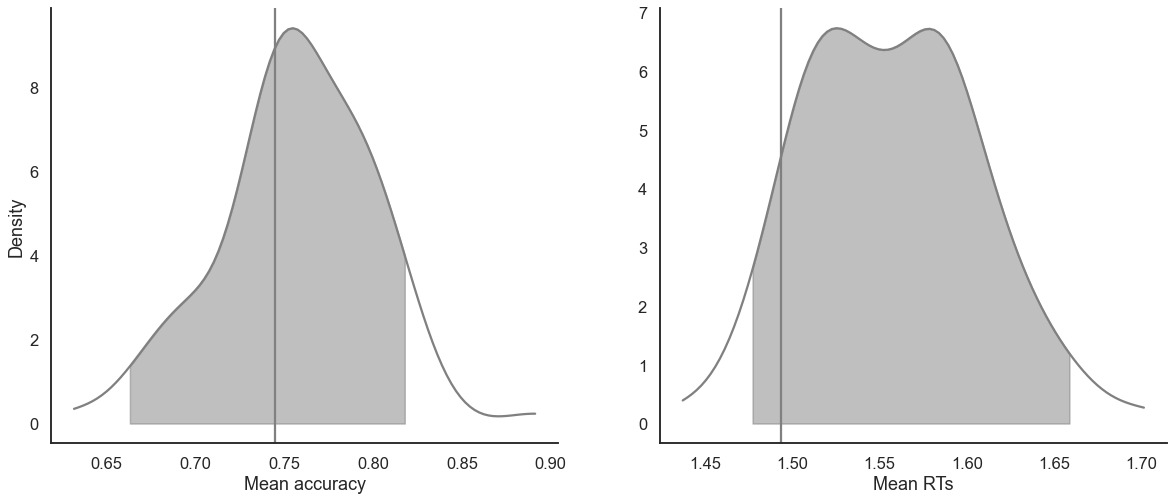

In [13]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

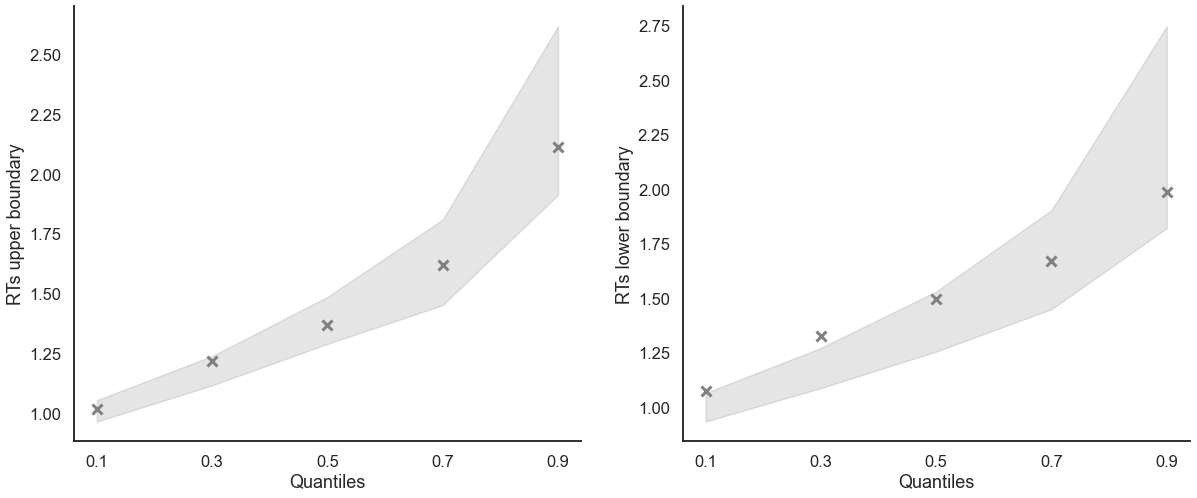

In [14]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

### Grouped

In [15]:
import numpy as np

In [16]:
# Define new grouping variables, in this case, for the different choice pairs, but any grouping var can do
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [17]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1           AB          1                0.85  1.781978  0.086734   
                        2                0.85  1.434155  2.154589   
                        3                0.85  1.547182  0.421164   
                        4                0.85  1.582124  2.176706   
                        5                0.85  1.721519  0.804484   
...                                       ...       ...       ...   
3           CD          96               0.50  1.430185  0.225676   
                        97               0.70  1.558766  1.247999   
                        98               1.00  1.717454  1.662106   
                        99               0.85  1.633990  0.580274   
                        100              0.90  1.580506 -0.053624   

                                quant_30_rt_low  quant_30_rt_up  \
block_label choice_pair sample                                    
1           AB          1              1.661728        1.200728   
                        2              1.034555        1.229555   
                        3              1.617282        1.172282   
                        4              1.506874        1.189474   
                        5              1.386669        1.257469   
...                                         ...             ...   
3           CD          96             1.262535        1.111335   
                        97             1.572966        1.234766   
                        98                  NaN        1.223304   
                        99             1.487040        1.187840   
                        100            1.877956        1.096556   

                                quant_50_rt_low  quant_50_rt_up  \
block_label choice_pair sample                                    
1           AB          1              1.862528        1.780528   
                        2              1.058555        1.303555   
                        3              2.075282        1.356282   
                        4              1.569674        1.451674   
                        5              1.420669        1.684669   
...                                         ...             ...   
3           CD          96             1.399435        1.281935   
                        97             1.610466        1.308966   
                        98                  NaN        1.442904   
                        99             1.619840        1.441840   
                        100            1.996356        1.534856   

                                quant_70_rt_low  quant_70_rt_up  
block_label choice_pair sample                                   
1           AB          1              1.967328        2.178728  
                        2              1.611755        1.444955  
                        3              2.235282        1.704482  
                        4              1.716074        1.769474  
                        5              2.029469        1.935469  
...                                         ...             ...  
3           CD          96             1.756035        1.622235  
                        97             1.652966        1.440866  
                        98                  NaN        1.662104  
                        99             1.639040        2.019240  
                        100            2.114756        1.869356  

[1200 rows x 9 columns]

In [18]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_low  \
block_bins sample                                                       
1          1            0.766667  1.323861  1.294795         1.063528   
           2            0.533333  1.501955  1.014368         1.257655   
           3            0.800000  1.805949  1.751752         1.242782   
           4            0.800000  1.616841  1.091075         1.161174   
           5            0.766667  1.662902  1.502174         1.553069   
...                          ...       ...       ...              ...   
8          96           0.758621  1.439556  1.431299         1.295335   
           97           0.758621  1.419656  1.252392         1.342766   
           98           0.758621  1.410352  1.297970         1.399504   
           99           0.965517  1.360978  1.466397         1.315840   
           100          0.827586  1.584666  1.356130         1.137156   

                   quant_30_rt_up  quant_50_rt_low  quant_50_rt_up  \
block_bins sample                                                    
1          1             1.057928         1.082528        1.144528   
           2             1.130055         1.382055        1.449555   
           3             1.237482         1.599782        1.539282   
           4             1.357474         1.444174        1.511674   
           5             1.169069         1.683669        1.303669   
...                           ...              ...             ...   
8          96            1.202735         1.408935        1.344435   
           97            1.125666         1.366966        1.291466   
           98            1.194704         1.506904        1.260404   
           99            1.160440         1.315840        1.256840   
           100           1.308256         1.148356        1.467856   

                   quant_70_rt_low  quant_70_rt_up  
block_bins sample                                   
1          1              1.373128        1.229128  
           2              1.682155        1.613055  
           3              1.937282        2.098582  
           4              1.541174        1.846274  
           5              1.736869        1.783669  
...                            ...             ...  
8          96             1.436935        1.497335  
           97             1.410766        1.550566  
           98             1.523304        1.454004  
           99             1.315840        1.437740  
           100            1.181956        1.865556  

[800 rows x 9 columns]

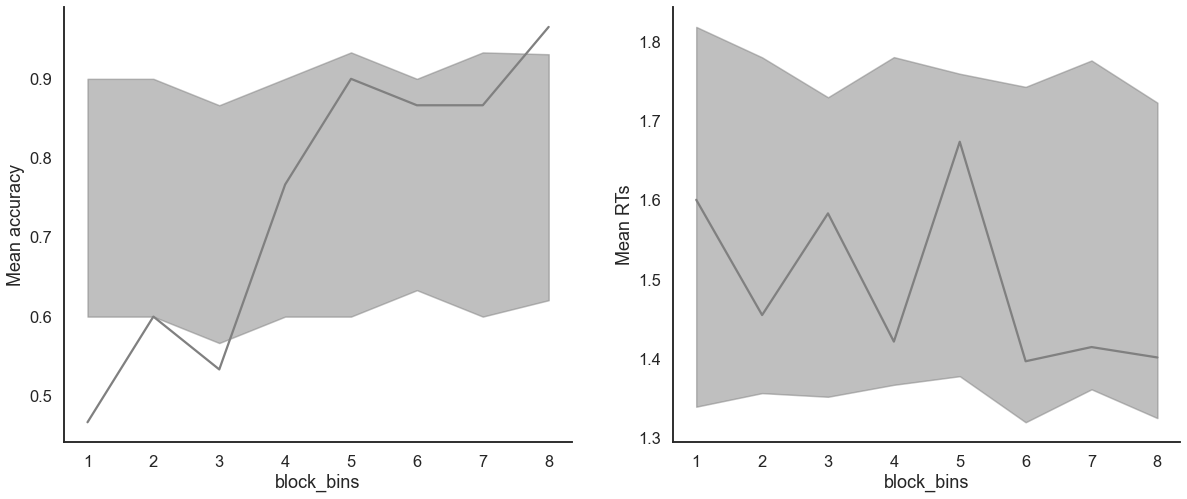

In [19]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

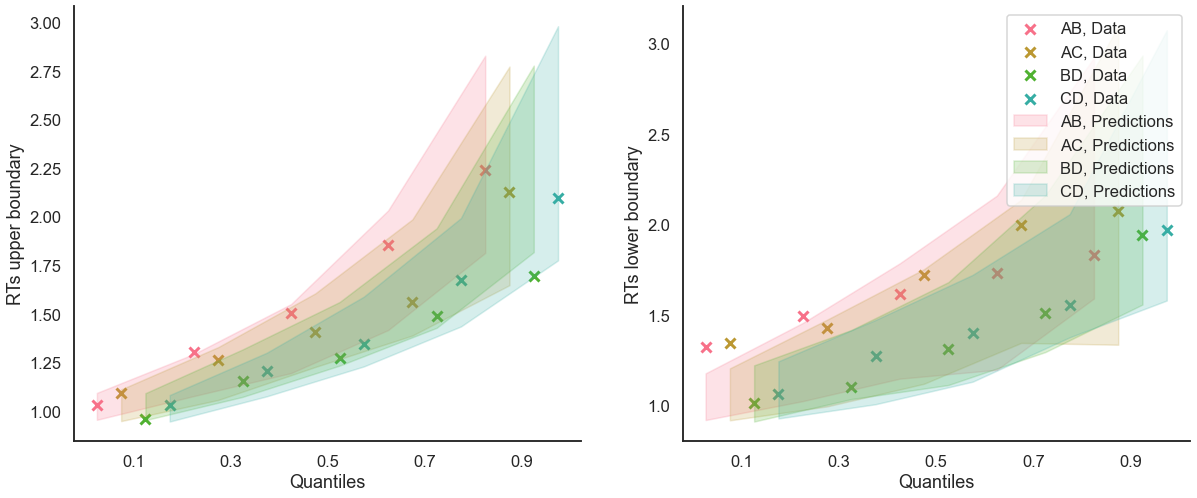

In [20]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);